# **Background Problem**
---

At company ABC, the website has experienced a significant decrease in several key performance metrics, including a 20% decrease in Conversion Rate.

In an effort to understand the underlying causes of this decline, the marketing team has conducted a survey to gather feedback from users about their experience using the website.

Some of the responses from the survey indicate high levels of confusion and frustration, with users expressing that they feel confused and angry, leading them to ultimately exit the site. In response to these findings, the IT team has been tasked with creating a comparison between the old website and the new website to identify the best solution to address the existing issues. As the data team, our role is to assist in analyzing the data and providing insights to support the decision-making process in resolving this problem.






# **Objective**
---


*   How many sample sizes are there for testing on the treatment website?
*   Increasing the conversion rate metric to 25%
*   What is the best website to use for marketing?



**A/B Testing Website**
---

![Alt text](https://www.demltd.com/wp-content/uploads/2014/03/ab-testing1.jpg)


*Marketing just has 30 days to do A/B testing.*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# dummy data

np.random.seed(0)

# Generate unique IDs
unique_ids = np.arange(1000, 2000)

# Shuffle the IDs to ensure randomness
np.random.shuffle(unique_ids)

data = {
    'ID': unique_ids[:1000],
    'Conversion Rate': np.random.uniform(0.1, 1.5, 1000),
    'Engagement': np.random.randint(1, 50, 1000)
}

# Create DataFrame
df = pd.DataFrame(data)

df.head()

,ID,Conversion Rate,Engagement
0,1993,1.488903,7
1,1859,0.597315,2
2,1298,1.287676,48
3,1553,1.178944,2
4,1672,1.108739,22


## **Designing Experiment**
---

**Sample Size**

What will we do?
1. Significant Level (α) --> 0.05 (Type 1)
2. Power Level (1-ϐ) --> 0.8
3. Minimum Detecable Effect (MDE) --> 2 (High Sensitive)

$$
\text{n} = \frac{16 \sigma ^{2}} {\delta^{2}}
$$

In [ ]:
# Check with data control

std_sample = np.std(df['Conversion Rate']) ** 2
effect = 2

n_sample = (16 * std_sample) / 2 ** 2

print('Sample size', n_sample)

Sample size 0.6625447866723404


From the sample size, we used 66 samples for treatment on the new website.



In [ ]:
# find 68 customer for treatment

sample_size = df.sort_values(by = 'Engagement', ascending = False)\
                                  .head(66).reset_index(drop = True)

sample_size

,ID,Conversion Rate,Engagement
0,1104,1.279363,49
1,1669,1.441404,49
2,1943,0.652614,49
3,1968,0.897588,49
4,1261,0.776048,49
...,...,...,...
61,1438,0.320194,47
62,1738,1.360143,47
63,1494,0.445863,47
64,1735,1.458574,47


**Standart Error**

Why do we want to calculate the standard error? We must know whether the variability sample with populasi is well represented or not. This has an effect on the range-confidence interfal conversion rate.

In [ ]:
# Standar deviasi sampel
sample_std = np.std(sample_size['Conversion Rate'], ddof=1)

# Ukuran sampel
sample_data = len(sample_size['Conversion Rate'])

# Menghitung standar error
se = sample_std / np.sqrt(sample_data)

print("Standar Error Sampel:", se)

Standar Error Sampel: 0.05124158017926339


Result from a standard error The meaning is the sample is already close to the population.


Who is the customer who has received treatment?
*   We use 33 customers who have high engagement for treatment.

In [ ]:
np.random.seed(42)

treatment_sample = np.random.choice(sample_size['ID'], size=33, replace=False)
treatment_sample = sample_size[sample_size['ID'].isin(treatment_sample)]
treatment_sample

,ID,Conversion Rate,Engagement
0,1104,1.279363,49
3,1968,0.897588,49
4,1261,0.776048,49
5,1779,1.186989,49
6,1505,1.289136,49
8,1310,0.522369,49
9,1930,0.267616,49
12,1123,1.283120,49
13,1570,0.439544,49
16,1704,1.179738,48


Skip this process. Imagine that after 30 days we obtain a new Conversion Rate from 33 customer treatment and control

In [ ]:
# obtain new result from treatment data

treatment_id = treatment_sample.ID

# dummy ctr
random_cnv = np.random.uniform(0.6, 1.2, len(treatment_id))

# obtain new columns
treatment_sample['Conversion Rate'] = random_cnv

treatment_sample.drop(columns=['Engagement'], inplace = True)

<ipython-input-7-e15495e5e755>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_sample['Conversion Rate'] = random_cnv
<ipython-input-7-e15495e5e755>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_sample.drop(columns=['Engagement'], inplace = True)


In [ ]:
# sanichek
treatment_sample

,ID,Conversion Rate
0,1104,0.620633
3,1968,1.145592
4,1261,0.755268
5,1779,0.997513
6,1505,0.787027
8,1310,0.912041
9,1930,0.928026
12,1123,0.710913
13,1570,1.181751
16,1704,1.065080


In [ ]:
# obtain control new conversion rate
control_data = sample_size[~ sample_size['ID'].isin(treatment_sample['ID'])]

# dummy conversion rate
random_cnv = np.random.uniform(0.2, 1.0, len(control_data))

control_data['Conversion Rate'] = random_cnv

control_data.drop(columns=['Engagement'], inplace = True)

<ipython-input-9-e262af8167e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_data['Conversion Rate'] = random_cnv
<ipython-input-9-e262af8167e0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_data.drop(columns=['Engagement'], inplace = True)


In [ ]:
control_data

,ID,Conversion Rate
1,1669,0.783206
2,1943,0.817016
7,1398,0.259236
10,1748,0.486773
11,1500,0.292695
14,1007,0.890483
15,1126,0.698639
18,1488,0.464718
20,1130,0.250847
21,1865,0.448786


In [ ]:
# concat data

# create new col
control_data['Group'] = 'Control'
treatment_sample['Group'] = 'Treatment'

# concat control and treatment data
data = pd.concat([control_data, treatment_sample])

<ipython-input-11-cb206b42acce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_data['Group'] = 'Control'
<ipython-input-11-cb206b42acce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_sample['Group'] = 'Treatment'


In [ ]:
# check
data.T

,1,2,7,10,11,14,15,18,20,21,...,48,50,54,56,58,59,62,63,64,65
ID,1669,1943,1398,1748,1500,1007,1126,1488,1130,1865,...,1937,1426,1232,1855,1155,1589,1738,1494,1735,1578
Conversion Rate,0.783206,0.817016,0.259236,0.486773,0.292695,0.890483,0.698639,0.464718,0.250847,0.448786,...,0.925618,0.684555,1.081318,0.64473,1.192132,1.063347,0.719229,0.603313,1.089277,1.024114
Group,Control,Control,Control,Control,Control,Control,Control,Control,Control,Control,...,Treatment,Treatment,Treatment,Treatment,Treatment,Treatment,Treatment,Treatment,Treatment,Treatment


In [ ]:
# length user id
control_id = len(data[data['Group'] == 'Control'])
treatment_id = len(data[data['Group'] == 'Treatment'])

print('length id control', control_id)
print('length id treatment', treatment_id)

length id control 33
length id treatment 33


<Axes: xlabel='Conversion Rate', ylabel='Count'>

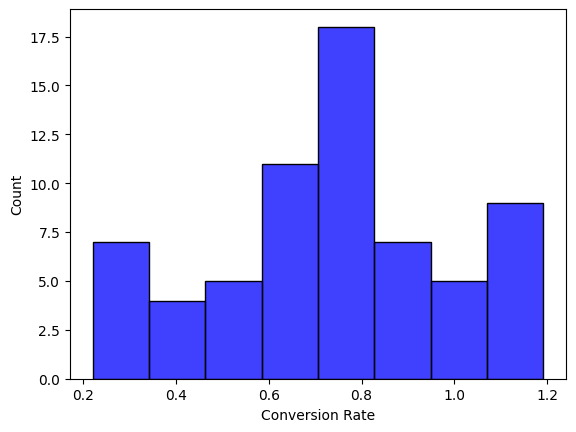

In [ ]:
# distribution data
sns.histplot(data['Conversion Rate'], color='blue')

From distribution is normal, this is **parametrics**

**Variance Different**

We want to know the variance data. High variance within a group can reduce the sensitivity of an experiment to detecting significant differences between two groups.

In [ ]:
# variance data
control_variance = np.var(data[data['Group'] == 'Control']['Conversion Rate']) # control data
treatment_variance = np.var(data[data['Group'] == 'Treatment']['Conversion Rate']) # treatment data

print('Variance of control data', control_variance)
print('Variance of treatment data', treatment_variance)

Variance of control data 0.04656331314439798
Variance of treatment data 0.036770897138563505


The smaller difference in variance between the Control and Treatment groups is a positive indication, as it suggests that the variability in responses among both groups is relatively similar. It reduces the likelihood that differences in outcomes between the groups are caused by factors other than the treatment being tested.

We must use the unpaired sample t-test to determine whether the difference is significant or not. We want to check two independent samples.

- Then we can define Null hypothesis ($H_0$) and Alternative hypothesis ($H_1$)

    $$H_0 : \text{independent_treatment} = \text{independent_control}$$
    $$H_1 : \text{independent_treatment} > \text{independent_control}$$

- Set siginificance level (alpha)
 - Significance level = 0.05

In [ ]:
from scipy.stats import ttest_ind

# select data control and treatment
control = np.array(data[data['Group'] == 'Control']['Conversion Rate'])
treatment = np.array(data[data['Group'] == 'Treatment']['Conversion Rate'])

# calculate Wilcoxon rank-sum test
p_value = ttest_ind(treatment, control, alternative='greater')

# significance level
alpha = 0.05

# Compare P-Value with alphas
if p_value[1] <  alpha:
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


To statistically confirm whether there's a significant difference in the distribution of values between the two groups, you used the independent samples test and found a sufficiently small p-value, indicating enough evidence to reject the null hypothesis.

Rejecting the null hypothesis suggests that the distribution of values in the **Treatment** group is greater than that of the **Control** group.

In [ ]:
# mean control and treatment

mean = data.groupby('Group')['Conversion Rate'].mean()

# change to dataframe
mean = pd.DataFrame(mean).reset_index()

mean

,Group,Conversion Rate
0,Control,0.578402
1,Treatment,0.897358


Now that we have **Treatment > Control**, is that true? don't fast give conclution, lets to next step

<Axes: xlabel='Group', ylabel='Conversion Rate'>

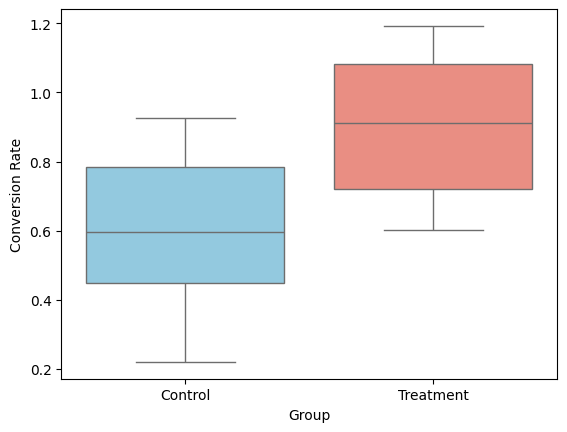

In [ ]:
# boxplot
sns.boxplot(x = 'Group',
            y='Conversion Rate',
            hue ='Group',
            data = data,
            palette=["skyblue", "salmon"])

From the boxplot, we know treatment has a median of 0.9 and control has a median of 0.6, then treatment has a consistent rate than control. Now we can draw a conclusion? not yet; next step again

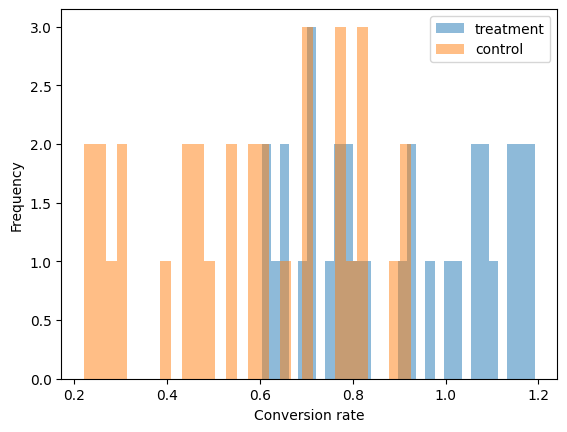

In [ ]:
# Histogram viz

import matplotlib.pyplot as plt

# define time_stream values by group
treat = data.loc[data['Group'] == 'Treatment', 'Conversion Rate']
con = data.loc[data['Group'] == 'Control', 'Conversion Rate']

# add three histograms to one plot
plt.hist(treat, alpha=0.5, label='treatment', bins=30)
plt.hist(con, alpha=0.5, label='control', bins=30)

# add plot title and axis labels
plt.xlabel('Conversion rate')
plt.ylabel('Frequency')

#a dd legend
plt.legend()

# display plot
plt.show()

Based on descriptive statistics, we cannot answer the best feature website of this and Since the histogram is bimodal, we cannot know the best feature from this. To conclude, before **Not Trust**, we must use the **Hipotesis statistic**.

- We want to prove: Average-Conversion Rate **(treatment)** than **(control)**
- Example,
  - $\mu_1$ is conversion rate **treatment**
  - $\mu_2$ is conversion rate **control**

- Then we can define Null hypothesis ($H_0$) and Alternative hypothesis ($H_1$)

    $$H_0 : \mu_1 = \mu_2$$
    $$H_1 : \mu_1 > \mu_2$$

- Set siginificance level (alpha)
 - Significance level = 0.05

**Determine the statistical test and calculate it**

To determine the statistical test using the t-test with equal or unequal variance, a similarity test of variance was performed using the F test.

In [ ]:
# split data treatment dan control
data_treatment = data[data['Group'] == 'Treatment']
data_control = data[data['Group'] == 'Control']

In [ ]:
# Calculate variant each group
np.var(data_control['Conversion Rate']), np.var(data_treatment['Conversion Rate'])

(0.04656331314439798, 0.036770897138563505)

We test:

*   H0 : f-value > f-critical and p-value < alpha (0.05)
*   H1 : f-value < f-critical and p-value > alpha (0.05)

Statetment:

*   H0 is **Equal**
*   H1 is **Unequal**




In [ ]:
# define F-test function
import scipy

def f_test(x, y):
    # 1. Set Significant Level
    alpha=0.05

    # Transform data to np array
    x = np.array(x)
    y = np.array(y)

    # calculate F test statistics
    f = np.var(x, ddof=1) / np.var(y, ddof=1)

    # Define degree of freedom
    dfn = x.size-1  # numerator
    dfd = y.size-1  # denominator

    # Calculate p-value & f_crit of F test statistics
    p = 1-scipy.stats.f.cdf(f, dfn, dfd)
    f_crit = scipy.stats.f.ppf(1-alpha,dfn,dfd)

    # Print results
    print(f"f_statistic value : {f:.3f}")
    print(f"f_critical value : {f_crit:.3f}")
    print(f"P-value : {p:.3f}")

#perform F-test
f_test(data_control['Conversion Rate'], data_treatment['Conversion Rate'])

f_statistic value : 1.266
f_critical value : 1.804
P-value : 0.254


F-test decision: **Reject H0**, F-test is **Unequal Variances**

Using function `stats.ttest_ind(a=...., b=...., equal_var=True/False, alternative = ...)`
   - `a`: Group data Control
   - `b`: Grup data Treatment
   - `equal_var = True` : For t-test with equal variance
   - `equal_var = False` : For  t-test with unequal variance
   - `alternative` = `two-sided`, or `less` or `greater` depends on alternative hypothesis

In [ ]:
from scipy import stats

result = stats.ttest_ind(a = data_treatment['Conversion Rate'],
                         b = data_control['Conversion Rate'],
                         equal_var=False,
                         alternative = "greater")

In [ ]:
# show pvalue
p_value = result.pvalue
p_value

1.9702012704684607e-08

In [ ]:
# show t-statistics
t_stats=result.statistic
t_stats

6.2502127138237595

## **Create decision rules**
---
In making statistical test decisions, we can use:
- Comparison of t-statistics with critical value
    - One-tailed (right), $t > t_{\alpha,df}$  → reject $H_0$

- Comparison p-value with alpha
  - pvalue < $\alpha$ → reject $H_0$

In [ ]:
# Comparison of t-statistics with critical values
# We have to calculate the t-critical first

alpha = 0.05
df = len(data_treatment['Conversion Rate'])+len(data_control['Conversion Rate'])-2  #df=n1+n2-2

t_critical = stats.t.ppf(1 - alpha, df)
print(f"t-Critical : {t_critical:.3f}")

t-Critical : 1.669


In [ ]:
# Make decisions from t-stats and t-crit
if t_stats > t_critical:
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


In [ ]:
# Compare P-Value with alpha.
if(p_value <  alpha):
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


**BlandAltman Plot**

We want to ensure that there are significant differences based on visualization. **BlandAltman Plot**

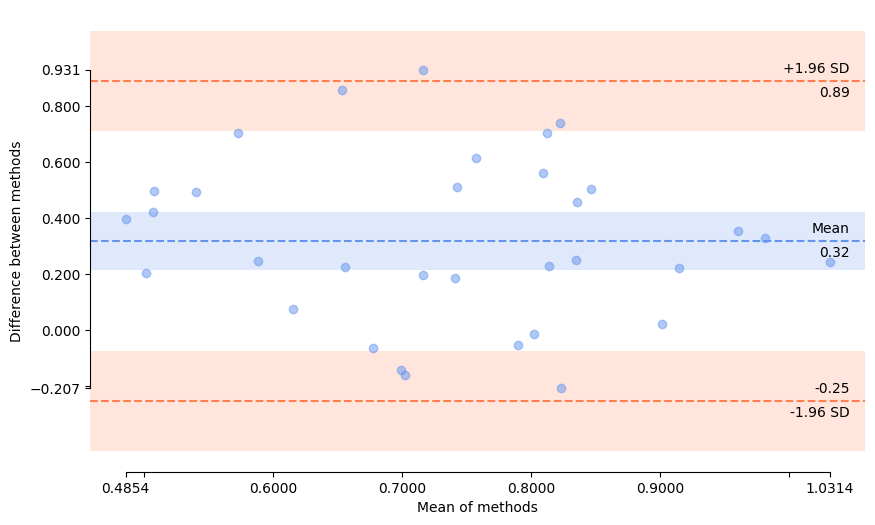

In [ ]:
import pyCompare
import matplotlib.pyplot as plt

# Fig size
fig, ax = plt.subplots(figsize=(10, 6))

# plot Bland-Altman
pyCompare.blandAltman(treatment, control, ax=ax)
plt.show()

- We get that the mean bias is 0.32, which means there is a systematic bias between A and B, meaning there is a significant difference.
- Judging from the data distribution, the agreement is not good because it is far from the mean bias, which means there is a significant difference.
- The range of limits of agreement has a high range, meaning there is poor agreement and there are significant differences.

With a CL of 95%, the results obtained from the decision to test the hypothesis using both p-value and t-statistics give the same result, namely reject $H_0$. So, we can conclude that with a confidence level of 95%, there is sufficient evidence that the average time stream of users who received the new recommendation system algorithm is higher than the old one.

- We can calculate the difference between the average user time streams in the two groups using the confidence level.
- Confidence level can be used to estimate (estimate) in what interval (range) what is the average difference (difference) between the two groups in the population

* To calculate the confidence interval for the mean difference, we can use CompareMeans

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=data_treatment['Conversion Rate']),
                  d2 = DescrStatsW(data=data_control['Conversion Rate']))

lower, upper = cm.tconfint_diff(alpha=0.05,
                                alternative='two-sided',
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ 0.21698264142672413 0.4209303789158137 ]


Based on these results, we are 95% sure that the difference in the mean conversion rates in the treatment and control groups lies between 0.22 and 0.42 percentages.


## **Simulation**

Can it be increased to 25% after treatment?

In [ ]:
# Mean conversion rate of the control group
conversion_rate_control = 0.635361

# Mean conversion rate of the treatment group
conversion_rate_treatment = 0.928945

# Calculate the percentage increase from the control group to the treatment group
increase_percentage = ((conversion_rate_treatment - conversion_rate_control) / conversion_rate_control) * 100

# Check if the increase is greater than 25%
if increase_percentage > 25:
    print(f"The difference of treatment compared to control is {increase_percentage:.2f}%. The increase in conversion rate exceeds 25%.")
else:
    print("The increase is less than or equal to 25%.")

The difference of treatment compared to control is 46.21%. The increase in conversion rate exceeds 25%.


**Answer the answer objective**

*   How many sample sizes are there for testing on the treatment website?
    - **Answer** : 33 size sample
*   Increasing the conversion rate metric to 25%
    - **Answer** : Yes, of course. After treatment, the conversion rate increased by more than 25%.
*   What is the best website to use for marketing?
    - **Answer** : Treatment website



## **Recommendation**

*What can we recommend for E-Commmerce?*


In launching a feature, it is not only considered from a statistically significant point of view, but also practically significant in business (e.g. cost).